## IS Full Temp Analysis Outline

This notebook summarzies the full temperature IS analysis as of **5/24/2018**. The main goals are the following:

1) Check for the appearance of multiple RC processes

2) Account for these processes using diffusion mechanisms or RC techniques, which may involve the use of a CPE

The hope is that we can use the framework at low T, where multiple RC processes *appear* to dominate the IS response, to understand the why the processes collapse into a single RC time constant at higher temperature

We begin by importing the data in the correct units below. **Units are *key* in this analysis**. Impedance $Z$ will be presented in $k\Omega cm^{2}$, meaning that $Q$ will acquire units of $k\Omega^{-1} cm^{-2} s^{\alpha}$. The units will be noted in comment blocks.

In [221]:
import numpy as np
import lmfit as lmf
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
%matplotlib inline



importdata = np.genfromtxt('IS400.csv',delimiter=',');  #read in data that i output from matlab. input format has each
                                                        #of the 16 Temperature data sets stacked vertically. 
npoints = 101; #each T has 101 points
IS400 = np.zeros((16,npoints,5)) #Initialize new 3d array to hold data. note: first index is what we would traditionally 
                            #think of as the last index. it makes sense though when you think hierarchically,
                            #i.e. main list has 16 elements each of which has 101 smaller elements containing 5 elemnts. 
for i in range(0,16):
    IS400[i,:,:]=importdata[(npoints*i):(npoints*(i+1)) , :] #slice the data into subarrays  
    
## Function definitions

def Zr(T): #pulls out Z' in units of kOhm*cm^{2} (these are the standard units of impedance). Note that as is, the data is already in units of kOhm
    return IS400[T,:,3]*4e-2
def Zi(T): #pulls out Z'' in units of kOhm*cm^{2}
    return IS400[T,:,4]*4e-2
def w(T): #pulls out omega
    return IS400[T,:,0]



  
    


# Qualitative Data Analysis #


According to Orazem, et al [(10.1149/1.2168377)](http://jes.ecsdl.org/content/153/4/B129.abstract), we can use graphical analysis to make a qualitative and quantitative assessment of the physical processes revealed by impedance spectrra. Through consideration of the Nyquist plot and analysis of the real and imaginary components of the impedance $Z$ with respect to frequency $\omega$, we can characterize both the characteristic frequencies, CPE coefficient $Q$, and CPE exponent $\alpha$. We can then verify these data and run physical analysis on the processes that are represented by these parameters. 

We can do this via the following procedure:

1) **Inspect Nyquist plot**
    We want to see if there are physically distinct processes discernable in the complex plane and roughly determine if a CPE 
    is present
    
2) **Inspect $|Z|$ and $\phi$**
    The magnitude and phase angle in particular should tell explicitly reveal the presence of a CPE. For a CPE, the maximum 
    achievable $\phi < 90$, indicating that the impedance of the CPE isn't purely out of phase with the real part of the
    impedance like in a capacitor. 
   
3) **Look at Im(Z) vs. $\omega$**
    Im(Z) should tell us how many relaxation processes there are. Note that for a low frequency diffusion process, we also 
    expect there to be a time constant.
    
4) **Look at Re(Z) vs. $\omega$**
    The high frequency asymptote should allow an estimate for the series Ohmic resistance, $R_{s}$.
    
5) **Fit Nyquist Plots**
    Using parameters obtained from steps 2 and 3, see if we can generate a decent fit to the Nyquist plot.
    
    
Let's run this qualitative analysis on the entire data set to get an idea of what's going on
    

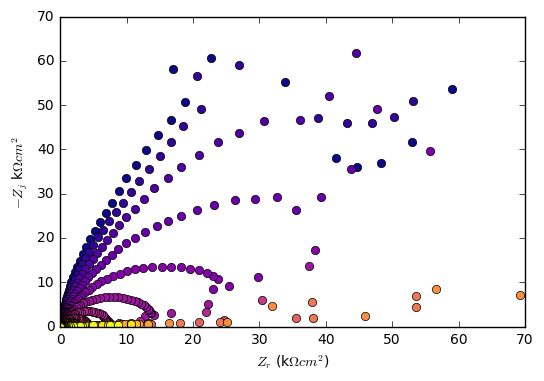

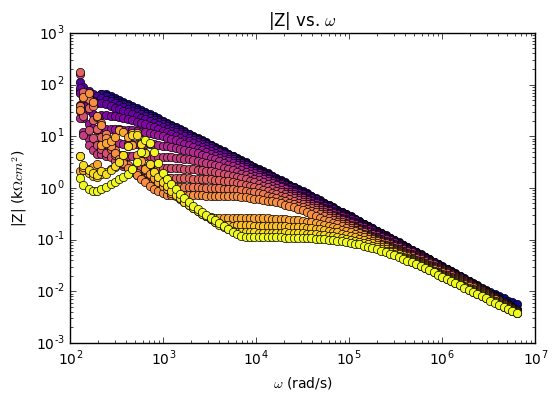

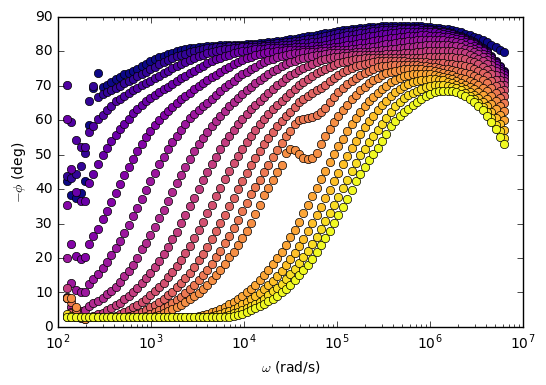

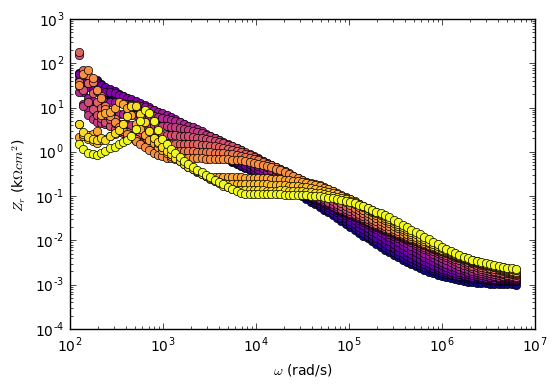

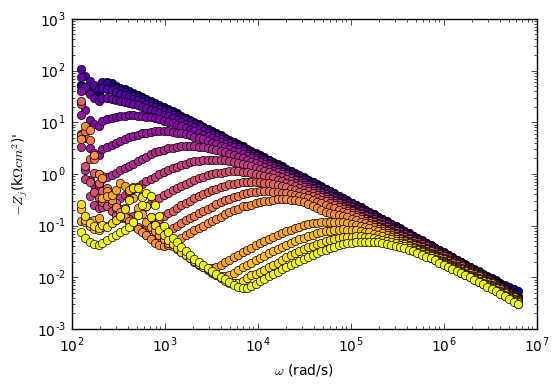

In [222]:
# Nyquist plots, |Z| and \phi vs \omega, Re(Z) vs \omega, and -Im(Z) vs \omega for all curves. 

# input temperature we wish to analyze
tmin = 0;
tmax = 16;


# set colormap for the data.
colSet = (cm.plasma(np.linspace(0,1,tmax)))
# print(colSet)


# Nyquist plots
fig,ax = plt.subplots(1,1)
for t,c in zip(range(tmin,tmax),colSet):
    ax.plot(Zr(t)[:],-Zi(t)[:],'o',c = c)
ax.set_xlabel("$Z_{r}$ (k$\Omega cm^{2}$)")
ax.set_ylabel("$-Z_{j}$ k$\Omega cm^{2}$")
ax.axis([0,70, 0,70])
plt.savefig('nyquist_all_zoom.png')

# |Z| vs. \omega
fig, ax = plt.subplots(1,1)
for t,c in zip(range(tmin,tmax),colSet):
#     c = next(color)
    ax.plot(w(t)[:],np.sqrt(np.square(Zr(t)[:]) + np.square(Zi(t)[:])),'o',c = c) 
# ax.set_aspect('equal')
ax.set_xlabel("$\omega$ (rad/s)")
ax.set_ylabel("|Z| (k$\Omega cm^{2}$)")
ax.set_xscale("log") 
ax.set_yscale("log") 
ax.set_title("|Z| vs. $\omega$")
#ax.set_xlim([0,1]);
# ax.set_ylim([1e-1,1e2]);
plt.savefig('magZ_all.png')

# \phi vs. \omega
fig, ax = plt.subplots(1,1)
for t,c in zip(range(tmin,tmax),colSet):
    ax.plot(w(t)[:],-np.arctan((Zi(t)[:])/(Zr(t)[:]))*(180/np.pi),'o',c = c)
# ax.set_aspect('equal')
ax.set_xlabel("$\omega$ (rad/s)")
ax.set_ylabel("$-\phi$ (deg)")
ax.set_xscale("log") 
# ax.set_yscale("log") 
# ax.set_title("$\phi$ vs. $\omega$")
#ax.set_xlim([0,1]);
#ax.set_ylim([0,1]);
plt.savefig('phase_all.png')

# Re(Z) vs. \omega
fig, ax = plt.subplots(1,1)
for t,c in zip(range(tmin,tmax),colSet):
    ax.plot(w(t)[:],Zr(t)[:],'o', c = c)
ax.set_xlabel("$\omega$ (rad/s)")
ax.set_ylabel("$Z_{r}$ (k$\Omega cm^{2}$)")
ax.set_xscale("log") 
ax.set_yscale("log") 
# ax.set_title("Re(Z) vs. $\omega$")
#ax.set_xlim([0,1]);
# ax.set_ylim([0,650]);
plt.savefig('reZ_all.png')

# Im(Z) vs. \omega
fig, ax = plt.subplots(1,1)
for t,c in zip(range(tmin,tmax),colSet):
    ax.plot(w(t)[:],abs(-Zi(t)[:]),'o', c = c)
# ax.set_aspect('equal')
ax.set_xlabel("$\omega$ (rad/s)")
ax.set_ylabel("$-Z_{j}$(k$\Omega cm^{2}$)'")
ax.set_xscale("log") 
ax.set_yscale("log") 
# ax.set_title("Im(Z) vs. $\omega$")
#ax.set_xlim([0,1]);
# ax.set_ylim([0,1]);
plt.savefig('imZlog_all.png')


There's a lot of information here; so let's go through it plot by plot:

## 1) Nyquist plots ##
At the lowest temperatures (~indices 0-5), we clearly have no complete arcs indicating 1 time constant. The lack of an RC arc implies no single dominant kinetic process. At higher temperatures (~indices 6-end), nearly complete RC arcs appear, indicating the appearance of a dominant kinetic process. As temperature increases, the radius of the arc decreases dramatically, implying that the time constants of these kinetic processes decrease. This fits with physical intuition of the data analysis thus far--at higher temperatures, the resistance to recombination decreases leading to a smaller recombination lifetime $\tau_n$. 

## 2) |Z| vs. $\omega$ plots ##
I'm honestly not sure what to make of these. They all have roughly the same shape. It's interesting to note that |Z| appears to initially decrease with T as expected; however, at about the 4th or 5th curve, the impedance begins to rise again in a very regular fashion. What does this mean? Perhaps there is some new resistance activated after the 4th or 5th index? Is it a capacitance/CPE, or a real resistance? This may fit with the notion that after the 4th or 5th curve, a recombination process is activated and becomes more pronounced with T. 

## 3) $\phi$ vs. $\omega$ plots ##
These are cool looking. Basically, there are *no* pure capacitors with $\phi = 90^{0}$ at *any* temperature. The closest we get is at low temperature, where the $\phi$ appears to have 2 broad shoulders. As temperature increases, these shoulders evolve into broad peaks from indices ~5-12. At indices 11-12, the lower peak becomes very sharp. Above index 12, the lower frequency peak dissapears, and only the high frequency CPE-type phase angle is left.

According to Orazem, et al [(10.1149/1.2168377)](http://jes.ecsdl.org/content/153/4/B129.abstract) inflection points in $\phi$ indicate characteristic frequencies and time constants. At low temperatures, the broad shoulders have a very low frequency time constant, and almost indistinguishable high frequency time constant. This seems basically true up intil indices 11-12, where the appearance of a intermediate frequency peak in addition to the high frequency peak may indicate 2 relaxation processes. 

## 4) $Z_{r}$ vs. $\omega$ plots ##
The Orazem paper above states that the these plots contain the same information as the modulus plots in section 2. The high frequency part of the impedance should reveal the value of $R_{s}$, the series resistance. Interestingly, $R_{s}$ appears to increase with $T$. I'm not quite sure what to make of that (or even if this is an accurate way od determining $R_{s}$; the CPE analysis outlined in the kinetic.ipynb indicates it's not without problems). 

To answer the question posed in the plot of $|Z|$ vs. $\omega$, it seems like the increase in $|Z|$ results from an increase in Re(Z). 

## 5) $Im(Z)$ vs. $\omega$ plots ##
This is really what I was interested in looking at. Characteristic frequencies, and thus time constants, can be readily identified by looking at peaks in these plots. No correction for resistance is needed, as might be needed in the other plots. 

At the lowest temperatures (index < 5), we see no peaks, indicating no dominant kinetic processes. This matches exactly with that we inferred from the Nyquist plot. For indices >5, we start to see a small feature grow in at very low frequency, indicating a low frequency/long time constant kinetic process. As temperature increases, the position of this peak increases in frequency. At indices 11-12, we see a disjoint, and perhaps 2 *very* closely related peaks. For index >12, we see a discontinuous jump in the peak position and a merging of the 2 peaks into 1 (maybe).

So what is this telling me? I think it's saying that, basically, for all curves measured, there is 1 dominant kinetic process, giving rise to the arcs in the Nyquist plot. At curves 11-12, there may be a hint of a second process, but from curve 13 onward, it is again dominated by a single time consant. Note that these $\tau_{n}$ are clearly all CPEs and thus indicative of distributions of time constants. 

So let's take a look at a reduced range of the data. Maybe indices 5-16. I'm especially curious about what curevs 11-12 look like in the Nyquist plot, so lets take a look at this one first



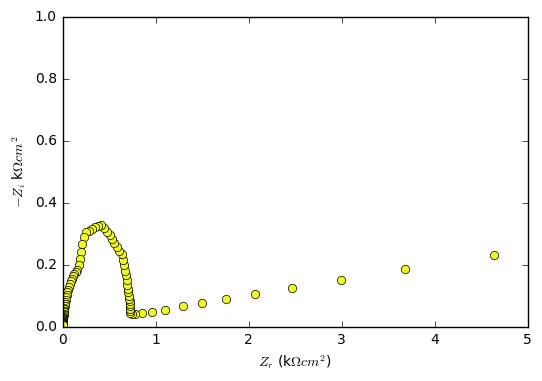

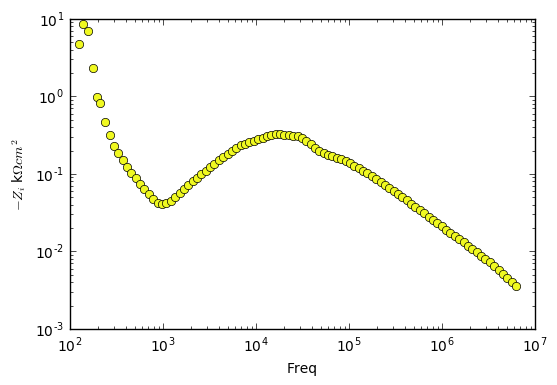

In [223]:
tstar = 11

# Nyquist plots
fig,ax = plt.subplots(1,1)
# for t,c in zip(range(11,tmax),colSet):
ax.plot(Zr(tstar)[:],-Zi(tstar)[:],'o',c = c)
ax.set_xlabel("$Z_{r}$ (k$\Omega cm^{2}$)")
ax.set_ylabel("$-Z_{i}$ k$\Omega cm^{2}$")
ax.axis([0,5, 0,1])
# plt.savefig('nyquist_all_zoom.png')


fig,ax = plt.subplots(1,1)
# for t,c in zip(range(11,tmax),colSet):
ax.plot(w(tstar)[:],abs(-Zi(tstar)[:]),'o', c = c)
ax.set_xlabel("Freq")
ax.set_ylabel("$-Z_{i}$ k$\Omega cm^{2}$")
ax.set_xscale("log") 
ax.set_yscale("log") 
# ax.axis([0,5, 0,1])
# plt.savefig('nyquist_all_zoom.png')

Hm, ok, so the data is noisey, with perpahps a high frequency shoulder and a peak. But, it's really sort of hard to say. We could proabably fit 1 CPE to this and be OK; alternatively, we could try 2 and see what we get. It certainly looks like the slopes on either side of the most prominent peak are different.

For now, let's try fitting 1 CPE to this. My expectation is that we are observing 2 different activation processes: one at low T and one operating at high T. The transition between them is obviously not smooth. 


So what we want to do is start with whatever temperature we think is best (from above, it should be probably index 5 or so), and from there fit the data to a CPE. We can then loop through the fitting procedure used in the kinetc outline ipynb. To obtain pareter estimates for the $n-th$ fit, we'll use the parameters obtained for the $(n-1)-th$ fit.  

To prepare for the fit, we'll need to go through the Nyquist plots of the curves we wish to analyze and evaluate the range of data we want to include in the fit. Since I don't have a good way of automating that at the moment, it's probably best to tabulate the start and end points manually. 

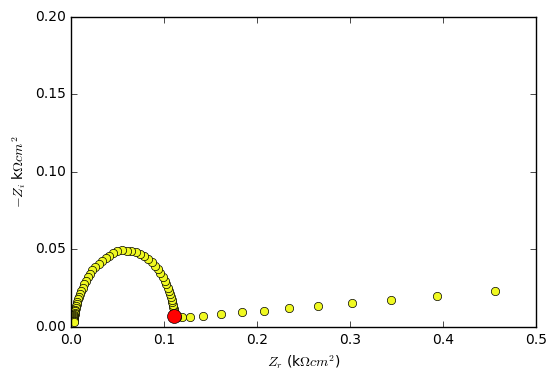

In [224]:
# clumsy way of ID-ing physically reasonable range of fit

bounds = np.zeros((16-5)+1)

Tt = 15

fig,ax = plt.subplots(1,1)
ax.plot(Zr(Tt)[:],-Zi(Tt)[:],'o', color = tuple(colSet[Tt]))
ax.plot(Zr(Tt)[39],-Zi(Tt)[39],'ro', markersize = 10)

ax.set_xlabel("$Z_{r}$ (k$\Omega cm^{2}$)")
ax.set_ylabel("$-Z_{i}$ k$\Omega cm^{2}$")
ax.axis([0,.5, 0,.2])
# plt.savefig('nyquist_all_zoom.png')

bounds[0] = 5
bounds[1] = 5
bounds[2] = 9
bounds[3] = 14
bounds[4] = 16
bounds[5] = 20
bounds[6] = 22
bounds[7] = 32
bounds[8] = 34
bounds[9] = 38
bounds[10] = 39
bounds[11] = 39




So now we have all the coordinates to start the fit. Before we define our function, let's obtain CPE estimates for alpha and Q from the lowest temperature data. We do this through analysis of Im($Z$) vs. $\omega$

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:33: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


-0.78554847488 7.79016379131
62 0.000476114429623


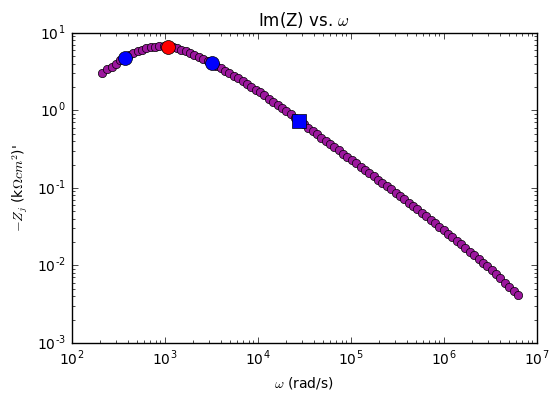

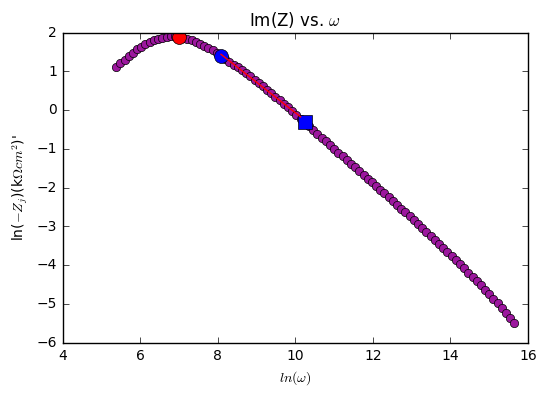

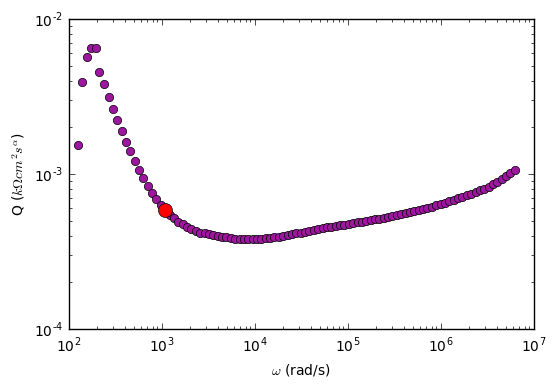

In [225]:
# Extract \alpha from the slope of the Im(z) vs. \omega.

# First obtain the bounds by inspection
fig, ax = plt.subplots(1,1)
ax.plot(w(5)[bounds[0]:],abs(-Zi(5)[bounds[0]:]),'o', color = tuple(colSet[5]))
ax.plot(w(5)[20],abs(-Zi(5)[20]),'ro',markersize = 10)
ax.plot(w(5)[20 + 10],abs(-Zi(5)[20 + 10]),'bo',markersize = 10)
ax.plot(w(5)[20 + 30],abs(-Zi(5)[20 + 30]),'bs',markersize = 10)
ax.plot(w(5)[20 - 10],abs(-Zi(5)[20 - 10]),'bo',markersize = 10)
# ax.plot(w(5)[20 + 30],abs(-Zi(5)[20 + 30]),'bs',markersize = 10)
ax.set_xlabel("$\omega$ (rad/s)")
ax.set_ylabel("$-Z_{j}$ (k$\Omega cm^{2}$)'")
ax.set_xscale("log") 
ax.set_yscale("log") 
ax.set_title("Im(Z) vs. $\omega$")
#ax.set_xlim([0,1]);
# ax.set_ylim([0,1]);
# plt.savefig('imZlogLTslope.png')

p1Guess = w(5)[20]
bAlpha1 = np.array([30, 50])



# since the peak appears at such low frequency, let's obtain a guess of \alpha by fitting the positive side of the distribution
x1 = np.vstack( [np.log(w(5)[bAlpha1[0]:bAlpha1[1]]), np.ones(len(w(5)[bAlpha1[0]:bAlpha1[1]]))]).T
y1 = np.log(abs(Zi(5)[bAlpha1[0]:bAlpha1[1]]))
m1,c1 = np.linalg.lstsq(x1,y1)[0]
print(m1,c1)

# First obtain the bounds by inspection
fig, ax = plt.subplots(1,1)
ax.plot(np.log(w(5)[bounds[0]:]),np.log(abs(-Zi(5)[bounds[0]:])),'o', color = tuple(colSet[5]))
ax.plot(np.log(w(5)[20]),np.log(abs(-Zi(5)[20])),'ro',markersize = 10)
ax.plot(np.log(w(5)[bAlpha1[0]]),np.log(abs(-Zi(5)[bAlpha1[0]])),'bo',markersize = 10)
ax.plot(np.log(w(5)[bAlpha1[1]]),np.log(abs(-Zi(5)[bAlpha1[1]])),'bs',markersize = 10)
ax.plot(np.log(w(5)[bAlpha1[0]:bAlpha1[1]]), m1*np.log(w(5)[bAlpha1[0]:bAlpha1[1]]) + c1, 'r')
ax.set_xlabel("$ln(\omega)$")
ax.set_ylabel("ln($-Z_{j}$)(k$\Omega cm^{2}$)'")
# ax.set_xscale("log") 
# ax.set_yscale("log") 
ax.set_title("Im(Z) vs. $\omega$")
#ax.set_xlim([0,1]);
# ax.set_ylim([0,1]);
plt.savefig('imZlogLTslope.png')



# save the slope as the alpha guess. calculate Q_{eff}
alphaG1 = abs(m1)

Qarray = np.sin((alphaG1*np.pi)/2)*(-1/(Zi(5)*w(5)**(alphaG1)))

fig, ax = plt.subplots(1,1)
ax.plot(w(5)[:],Qarray[:],'o', color= tuple(colSet[5]))
ax.plot(w(5)[20],Qarray[20],'ro', markersize = 10)

# ax.set_aspect('equal')
ax.set_xlabel("$\omega$ (rad/s)")
ax.set_ylabel("Q ($k \Omega cm^{2} s^{\\alpha}$)")
ax.set_xscale("log") 
ax.set_yscale("log")
# ax.set_title("Q vs. $\omega$")
#ax.set_xlim([0,1]);
#ax.set_ylim([0,1]);
plt.savefig('Q_LT.png')

wEff = np.argmax(w(5) > 1e5)
Qguess = Qarray[wEff]
print(wEff,Qguess)





Now we have the following parameter guesses for the lowest tempeature we want to analyze:

1) $\alpha \approx 0.78$

2) $Q_{eff} \approx 4.76\times 10^{-4}k\Omega^{-1} cm^{-2} s^{\alpha}$

Let's now define our fit and plug this in for the initial parameter estimates.


In [226]:
# set up the objective function using the lmfit pacakge. The objective function we are defining in this case are the residuals
# for both the real and imaginary parts of Z. A single array of both real and imaginary residuals is sent to lmfit, which
# then mnimizes the sum of the square of this array.

def circuitModelQ(w,Rs,Rct,Q,alpha):
    return Rs+(Rct/(1+((1j*w)**alpha)*Q*Rct))

def circuitResidQ(params,w,Zr,Zi):
    parvals = params.valuesdict()
    Rs = parvals['Rs']
    Rct = parvals['Rct']
    Q = parvals['Q']
    alpha = parvals['alpha']
    ZrHat = np.real(circuitModelQ(w,Rs,Rct,Q,alpha))
    ZiHat = np.imag(circuitModelQ(w,Rs,Rct,Q,alpha))
    resid1 = ZrHat-Zr
    resid2 = ZiHat-Zi
    return np.concatenate((resid1,resid2))

Parameters([('Rs', <Parameter 'Rs', value=0.026236906141342276 +/- 0.00961, bounds=[0:5]>), ('Rct', <Parameter 'Rct', value=15.095170505742605 +/- 0.0423, bounds=[0:100]>), ('Q', <Parameter 'Q', value=0.00012218589727245561 +/- 1.91e-06, bounds=[0:0.001]>), ('alpha', <Parameter 'alpha', value=0.91560827493884112 +/- 0.00222, bounds=[0:1]>)])


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


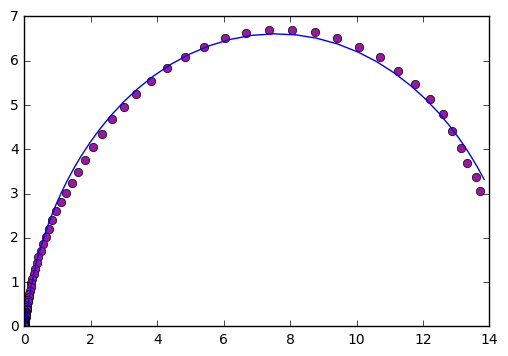

In [227]:
# add paramter estimates to the fit function
params = lmf.Parameters() 
params.add('Rs',value = .8, min = 0, max = 5)
params.add('Rct',value = 1, min = 0, max = 100)
params.add('Q',value = Qguess, min = 0, max = 1e-3)
params.add('alpha',value = alphaG1 , min = 0, max = 1)

# empty arrays for storing fit parameters
RsFits = []
RctFits = []
QFits = []
alphaFits =[]

# run the fit
fit = lmf.minimize(circuitResidQ,params,args = (w(5)[bounds[0]:],Zr(5)[bounds[0]:],Zi(5)[bounds[0]:]))
RsFits.append(fit.params['Rs'].value)
RctFits.append(fit.params['Rct'].value)
QFits.append(fit.params['Q'].value)
alphaFits.append(fit.params['alpha'].value)
fit.params

print(fit.params)
# plot the resulting fit
fig,ax = plt.subplots(1,1)
ax.plot(Zr(5)[bounds[0]:],-Zi(5)[bounds[0]:],'o',color = tuple(colSet[5]))
ax.plot(np.real(RsFits[0]+(RctFits[0]/(1+((1j*w(5)[bounds[0]:])**alphaFits[0])*QFits[0]*RctFits[0]))),-np.imag(RsFits[0]+(RctFits[0]/(1+((1j*w(5)[bounds[0]:])**alphaFits[0])*QFits[0]*RctFits[0]))))
# ax.set_aspect('equal')
# plt.savefig('nyquistCPEfit.png')


This seems to work great! At least, for this one loop. Now comes the programatically hard part (at least for me)--scaling the fits into a loop.

We're going to have to append the parameter outputs into a list. Then, call on the previous


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Parameters([('Rs', <Parameter 'Rs', value=0.022310958830988048 +/- 0.00783, bounds=[0:5]>), ('Rct', <Parameter 'Rct', value=7.5694436926520394 +/- 0.0236, bounds=[0:100]>), ('Q', <Parameter 'Q', value=0.00011212631909919446 +/- 2.55e-06, bounds=[0:0.001]>), ('alpha', <Parameter 'alpha', value=0.93136242088649557 +/- 0.003, bounds=[0:1]>)])
1
6
Parameters([('Rs', <Parameter 'Rs', value=0.015373404262724322 +/- 0.00428, bounds=[0:5]>), ('Rct', <Parameter 'Rct', value=4.2287767598783503 +/- 0.0119, bounds=[0:100]>), ('Q', <Parameter 'Q', value=0.00011958720936279665 +/- 2.69e-06, bounds=[0:0.001]>), ('alpha', <Parameter 'alpha', value=0.92770545514710478 +/- 0.00276, bounds=[0:1]>)])
2
7
Parameters([('Rs', <Parameter 'Rs', value=0.010042195756959915 +/- 0.00261, bounds=[0:5]>), ('Rct', <Parameter 'Rct', value=2.5123415087503265 +/- 0.00705, bounds=[0:100]>), ('Q', <Parameter 'Q', value=0.00012948252125450971 +/- 3.05e-06, bounds=[0:0.001]>), ('alpha', <Parameter 'alpha', value=0.923422089

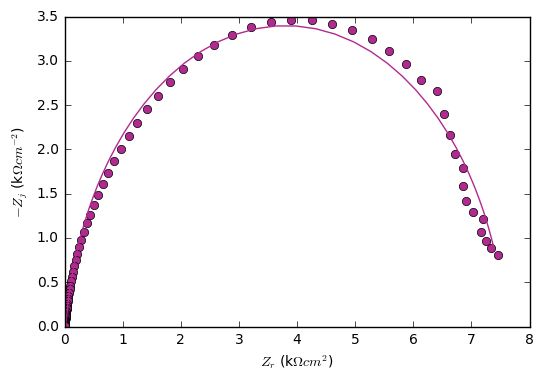

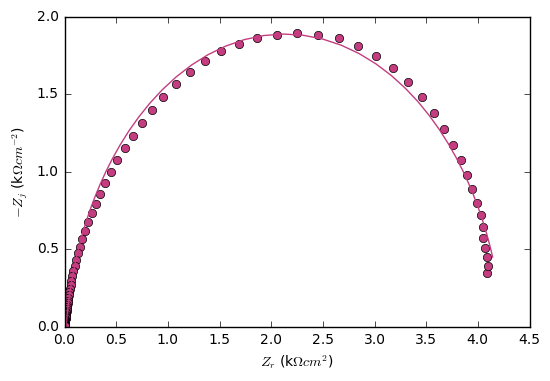

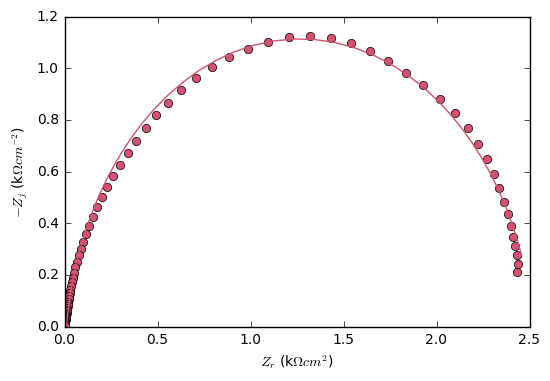

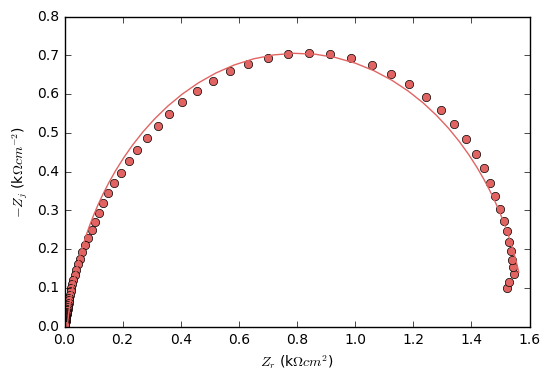

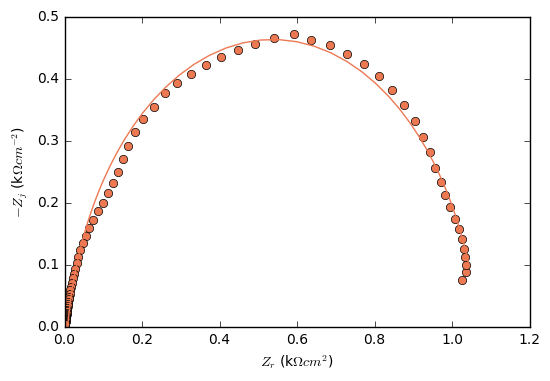

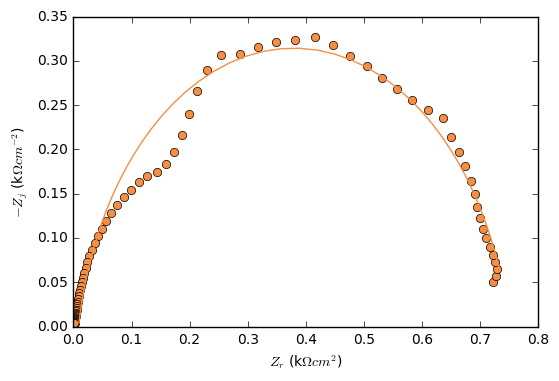

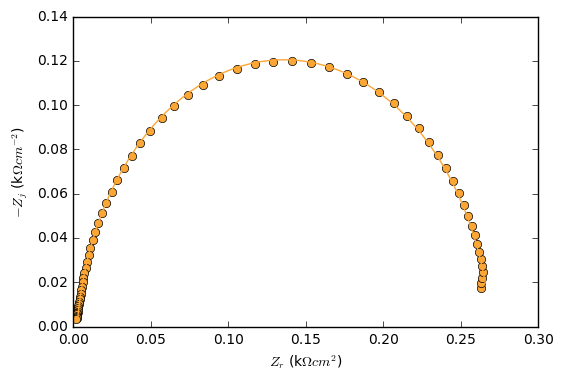

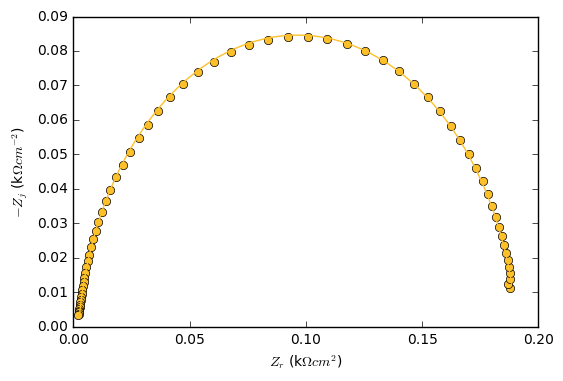

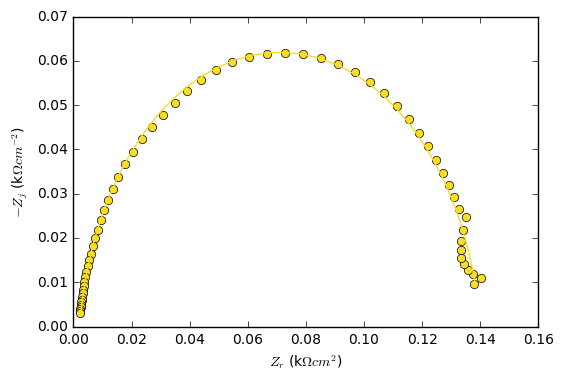

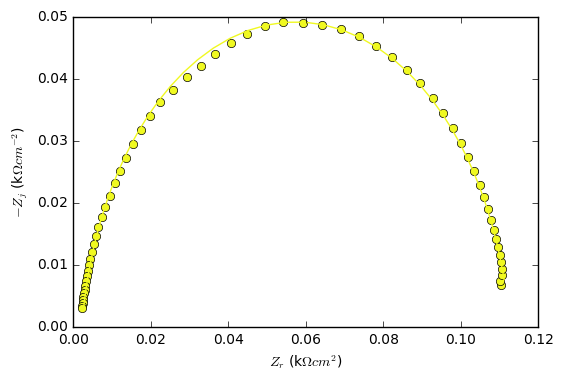

In [228]:
# run the next fit in a loop

# offset between low temperature data that we are analyzing and intitial temperature data in the dataset
offSet = 5;

for t in range(1,bounds.shape[0]-1):
# for t in range(1,5):
    params = lmf.Parameters() 
    params.add('Rs',value = RsFits[t-1], min = 0, max = 5)
    params.add('Rct',value = RctFits[t-1], min = 0, max = 100)
    params.add('Q',value = QFits[t-1], min = 0, max = 1e-3)
    params.add('alpha',value = alphaFits[t-1] , min = 0, max = 1)

    # run the fit
    fit = lmf.minimize(circuitResidQ,params,args = (w(t+offSet)[bounds[t]:],Zr(t+offSet)[bounds[t]:],Zi(t+offSet)[bounds[t]:]))
    RsFits.append(fit.params['Rs'].value)
    RctFits.append(fit.params['Rct'].value)
    QFits.append(fit.params['Q'].value)
    alphaFits.append(fit.params['alpha'].value)
    fit.params

    print(fit.params)
    print(t)
    print(t+offSet)
    # plot the resulting fit
    fig,ax = plt.subplots(1,1)
    ax.plot(Zr(t+offSet)[bounds[t]:],-Zi(t+offSet)[bounds[t]:],'o',color = tuple(colSet[t+offSet]))
    ax.plot(np.real(RsFits[t]+(RctFits[t]/(1+((1j*w(t+offSet)[bounds[t]:])**alphaFits[t])*QFits[t]*RctFits[t]))),-np.imag(RsFits[t]+(RctFits[t]/(1+((1j*w(t+offSet)[bounds[t]:])**alphaFits[t])*QFits[t]*RctFits[t]))),color = tuple(colSet[t+offSet]))     
    ax.set_xlabel("$Z_{r}$ (k$\Omega cm^{2}$)")
    ax.set_ylabel("$-Z_{j}$ (k$\Omega cm^{-2}$)")
    plt.savefig('nyquist_fit_'+ np.array2string(T[t+offSet].astype(int)) + '.png')
    

Awesome. This works!

It's not without it's problems. For instance, as expected, in curve 12, there appear to be 2 RC arcs that merge into each other. I'll have to account for that with a better model for that specific curve. 

Also note that the implementation is, as of now, rather clumsy. I'll have to make this more robust as in the next iteration.

For now, since we care about the physics of what's going on, let's see if we can calculate the RC time constants and plot them and the temperature vs. time. We would also like to remake the Nyquist plots with the RC time constants marked.

First, let's calculate $\tau$ and plot it and R as a function of temperature. We can then perform an Arrhenius fit to the data. 

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

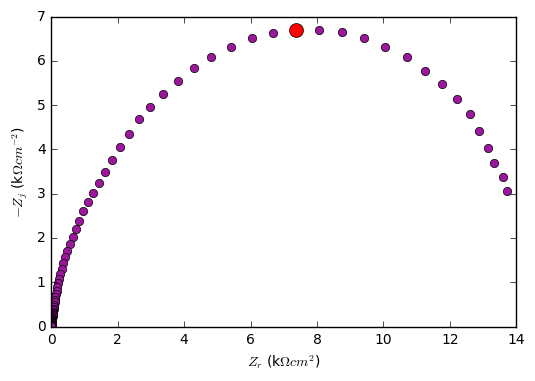

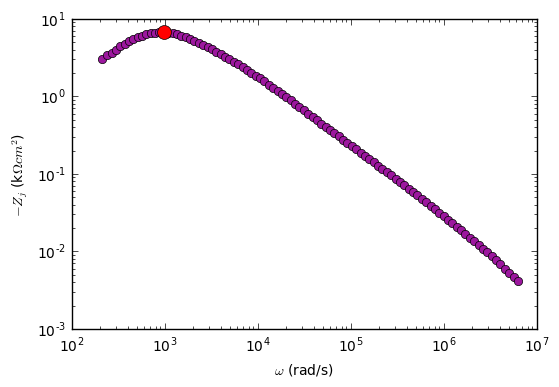

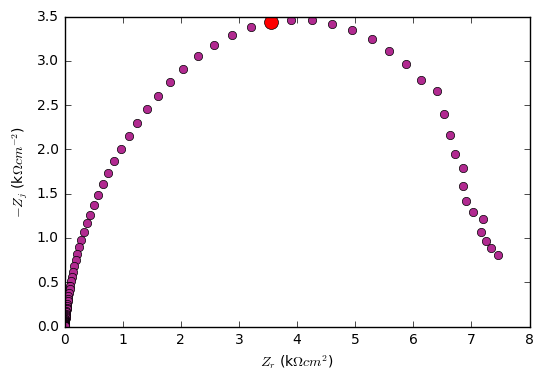

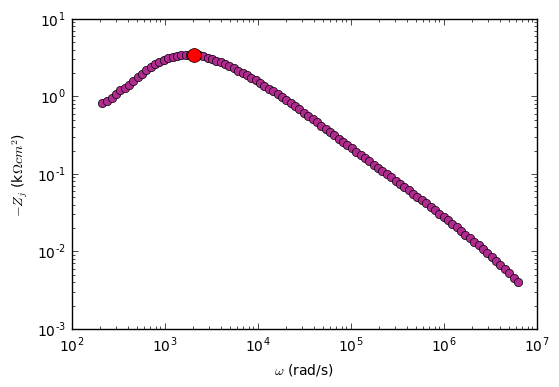

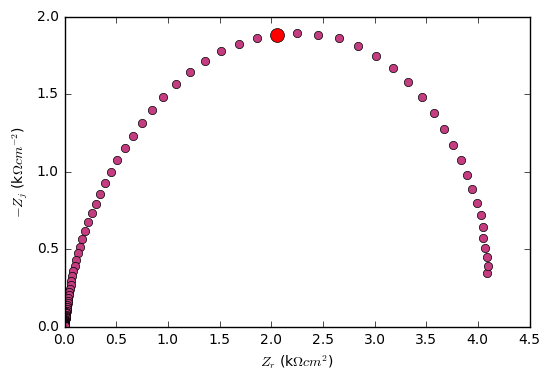

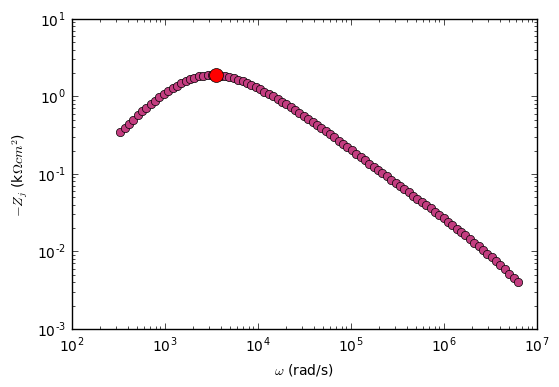

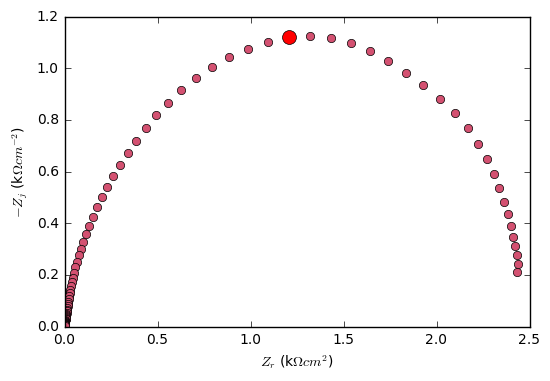

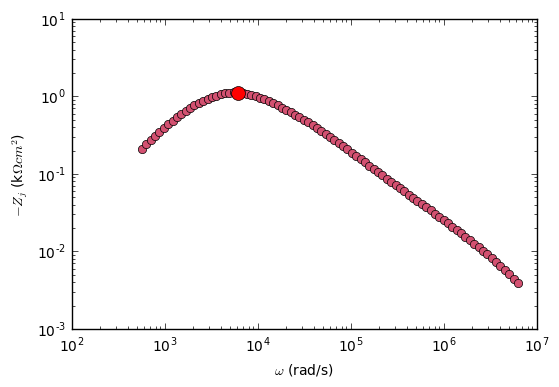

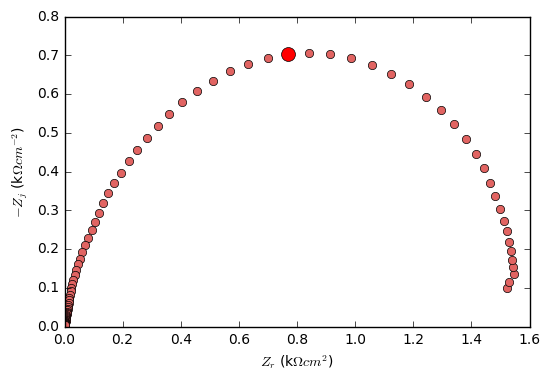

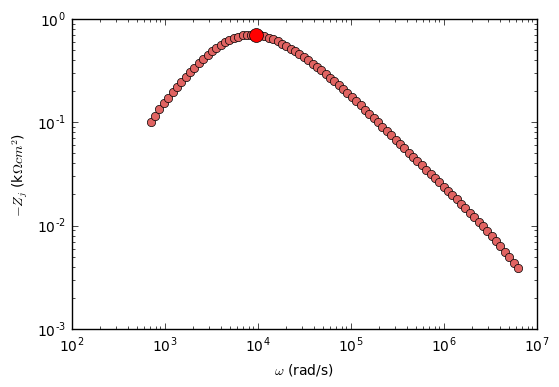

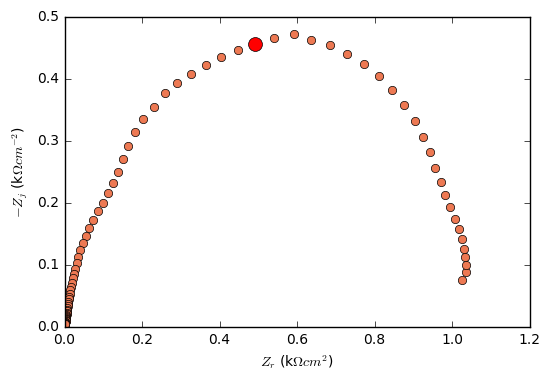

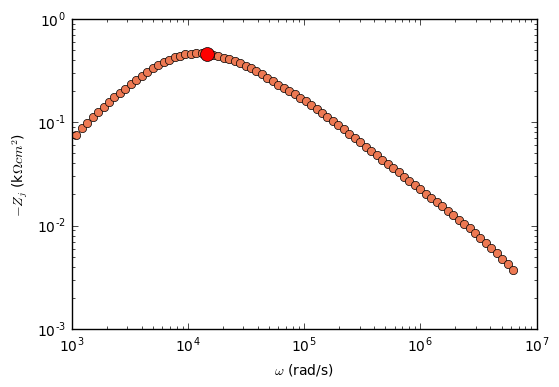

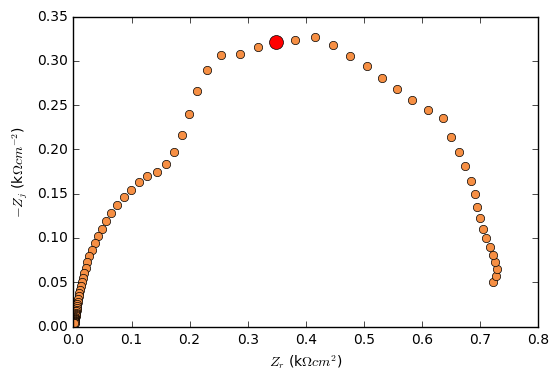

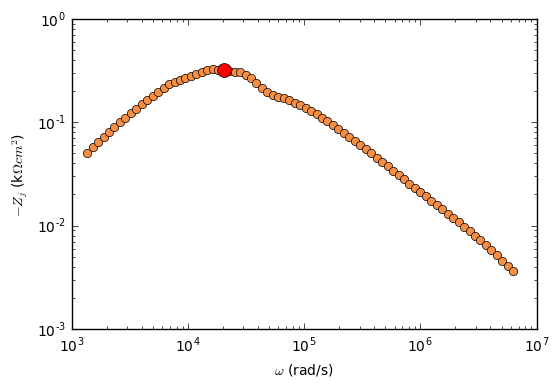

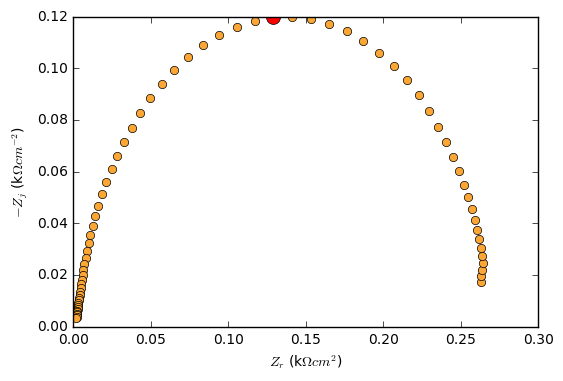

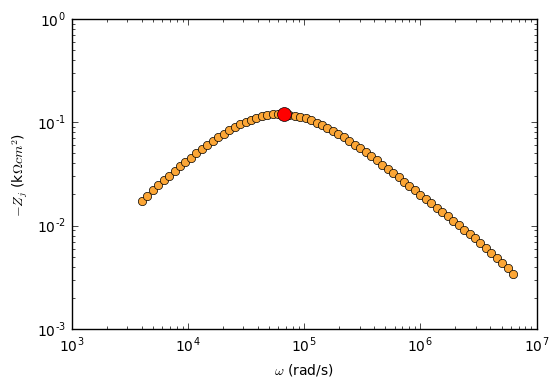

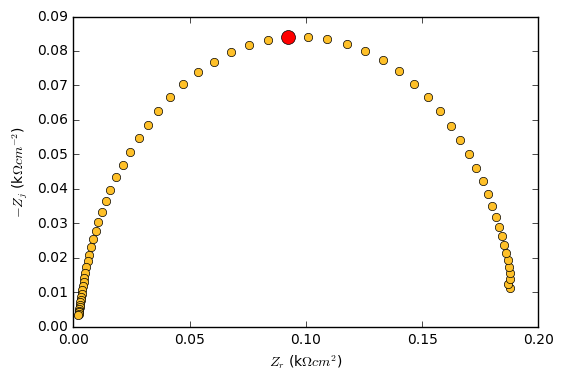

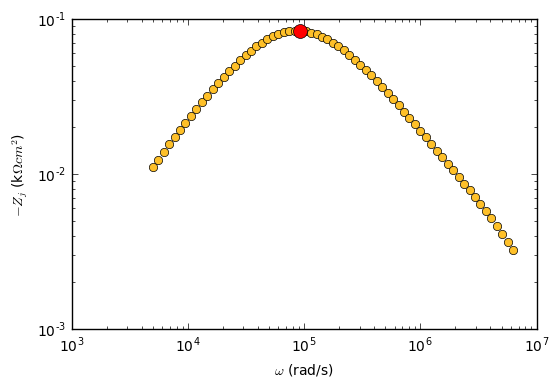

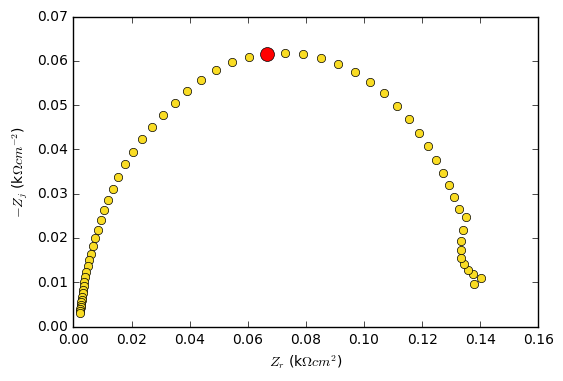

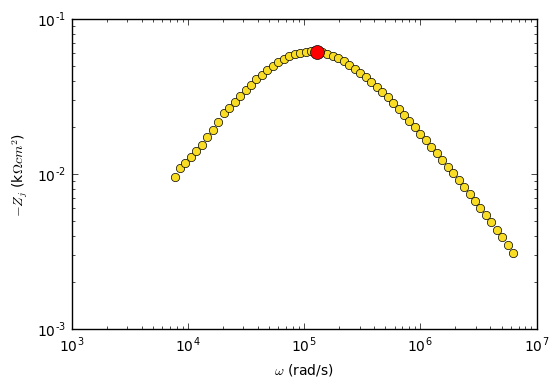

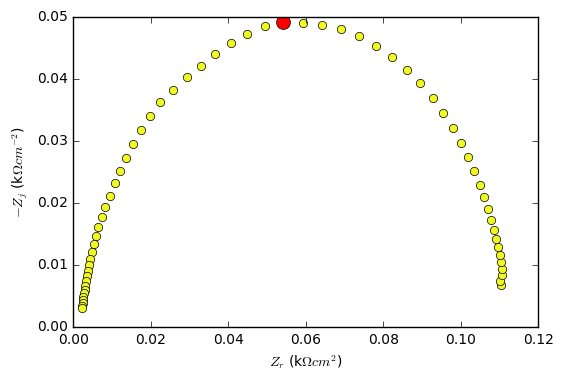

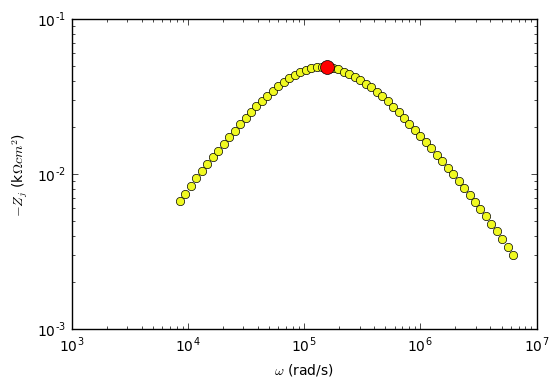

In [243]:
# calculate \tau from the RQ time constants like we did in the kinetic outline ipynb

# first make all the fit parameters np arrays to keep track of the data types
np.asarray(alphaFits)
np.asarray(QFits)
np.asarray(RsFits)
np.asarray(RctFits)

# now do the calculation. obtain both tau and the index of w0
tau = np.zeros(tmax-offSet)
wt0 = np.zeros(tmax-offSet)
for t in range(0,bounds.shape[0]-1):
    tau[t] = [QFits[t]*RctFits[t]]**(1/alphaFits[t])
    wt0[t] = np.argmax(w(t+offSet) > (1/tau[t]))
    
    
    fig,ax = plt.subplots(1,1)
    ax.plot(Zr(t+offSet)[bounds[t]:],-Zi(t+offSet)[bounds[t]:],'o',color=tuple(colSet[t+offSet]))
    ax.plot(Zr(t+offSet)[wt0[t]],-Zi(t+offSet)[wt0[t]],'ro', markersize = 10)
    ax.set_xlabel("$Z_{r}$ (k$\Omega cm^{2}$)")
    ax.set_ylabel("$-Z_{j}$ (k$\Omega cm^{-2}$)")
    plt.savefig('nyquist_tau_'+ np.array2string(T[t+offSet].astype(int)) + '.png')

    fig, ax = plt.subplots(1,1)
    ax.plot(w(t+offSet)[bounds[t]:],abs((-Zi(t+offSet)[bounds[t]:])),'o',color=tuple(colSet[t+offSet]))
    ax.plot(w(t+offSet)[wt0[t]],abs((-Zi(t+offSet)[wt0[t]])),'ro', markersize = 10)
    ax.set_xlabel("$\omega$ (rad/s)")
    ax.set_ylabel("$-Z_{j}$ (k$\Omega cm^{2}$)")
    ax.set_xscale("log") 
    ax.set_yscale("log") 
#     ax.set_title("Im(Z) vs. $\omega$")
    plt.savefig('imZ_tau_' + np.array2string(T[t+offSet].astype(int)) + '.png')


  



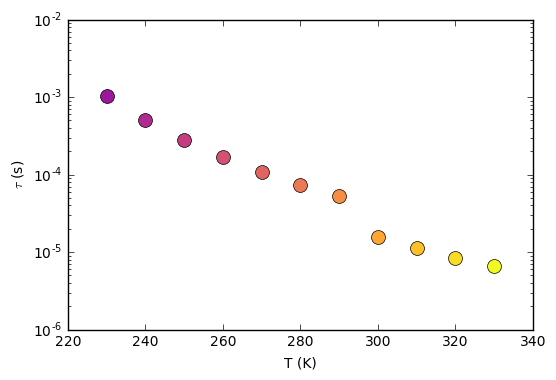

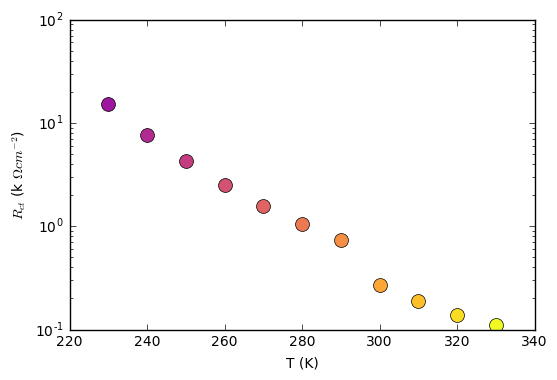

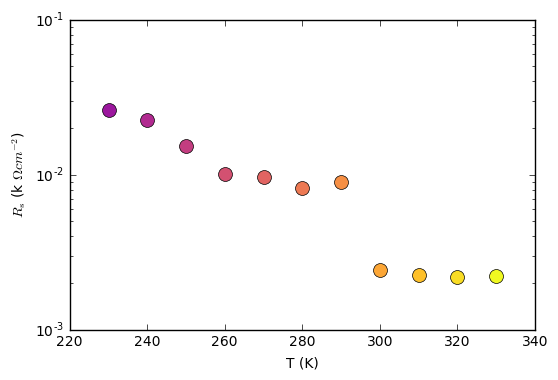

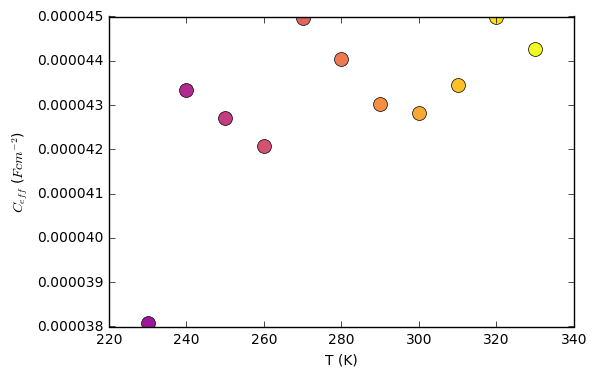

In [230]:
# plot the temperature dependence of the time constant. 

# generate the temperature array
T = np.linspace(180,180+(10*tmax),tmax,endpoint=False)


fig,ax = plt.subplots(1,1)
for t in range(0,bounds.shape[0]-1):
    ax.plot(T[t+offSet],tau[t],'o',color=tuple(colSet[t+offSet]),markersize = 10)
ax.set_xlabel("T (K)")
ax.set_ylabel("$\\tau$ (s)")
ax.set_yscale('log')
#     plt.savefig('nyquistTau.png')

fig,ax = plt.subplots(1,1)
for t in range(0,bounds.shape[0]-1):
    ax.plot(T[t+offSet],RctFits[t],'o',color=tuple(colSet[t+offSet]),markersize = 10)
ax.set_xlabel("T (K)")
ax.set_ylabel("$R_{ct}$ (k $\Omega cm^{-2}$)")
ax.set_yscale('log')
#     plt.savefig('nyquistTau.png')

fig,ax = plt.subplots(1,1)
for t in range(0,bounds.shape[0]-1):
    ax.plot(T[t+offSet],RsFits[t],'o',color=tuple(colSet[t+offSet]),markersize = 10)
ax.set_xlabel("T (K)")
ax.set_ylabel("$R_{s}$ (k $\Omega cm^{-2}$)")
ax.set_yscale('log')


# also calculate the effective capacitance (according to Brug, et. al.) and see if this matches with our intuition of what's happening
Ceff = np.zeros(tmax-offSet)
for t in range(0,bounds.shape[0]-1):
    Ceff[t] = [QFits[t]*((1/RsFits[t]) + (1/RctFits[t]))**(alphaFits[t]-1)]**(1/alphaFits[t])

fig,ax = plt.subplots(1,1)
for t in range(0,bounds.shape[0]-1):
    ax.plot(T[t+offSet],Ceff[t],'o',color=tuple(colSet[t+offSet]),markersize = 10)
ax.set_xlabel("T (K)")
ax.set_ylabel("$C_{eff}$ ($F cm^{-2}$)")
# ax.set_yscale('log')



Qualitatively, this fits with what we expect:

If $R_{ct}$ is in fact a recombination resistance, then at higher temperatures, we expect more recombination in our film (since recombination dominates the charge transport kinetics, at least in this frequency regime). 

Similarly, as more recombination occurs, we expect more recombination events per unit time. This is exactly what we see--the lifetime of the charge in the device decreases, indicating more trapping/de-trapping of charge. 

Also note the discontinuity in both the lifetime and $R_{ct}$. This seems to fit well with our idea that perhaps there are 2 recombination processes occuring, but we won't know really until we overlap the data and/or try a better fit for that particular curve. Note the huge discontinuity in $R_{s}$ as well.

The capacitance seems relatively constant at this frequency, which is interesting. We'll have to think carefully about this in the coming days. 

Now, let's run the actual fits to the data and extract activation energies $E_{\tau}$ and $E_{R_{ct}}$.




0.337770464398
0.329683748183
[ 16.5234447    8.26224634   4.36692652   2.42412684   1.40562558
   0.84740317   0.52901468   0.34079002   0.22585377   0.15357978
   0.10690348]


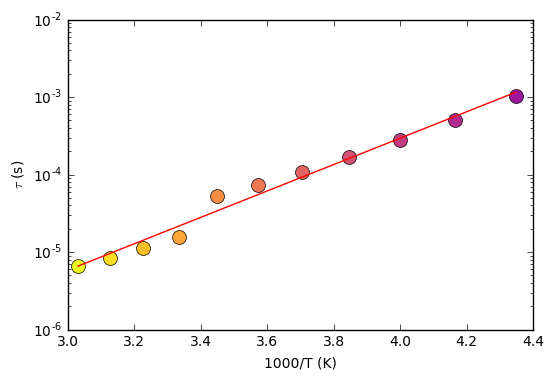

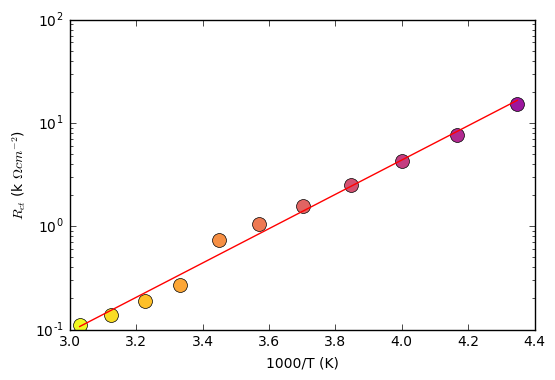

In [231]:
# now run the fits to \tau and to R_{ct}. they should be the same, but let's see what shakes out.

kB = 8.6173303e-5

# first run the fit to \tau
xt = np.vstack( [1e3/T[offSet:], np.ones(len(T[offSet:]))] ).T
yt = np.log(tau[:])
mt,ct = np.linalg.lstsq(xt,yt)[0]
# print(mt,ct)
Etau = ((kB*mt)*1e3)
print(Etau)
tauLine =  np.exp(mt*(1e3/T[offSet:])) * np.exp(ct)
# print(tauLine)

# now run the fit to R_{ct}
xr = np.vstack( [1e3/T[offSet:], np.ones(len(T[offSet:]))] ).T
yr = np.log(RctFits[:])
mr,cr = np.linalg.lstsq(xr,yr)[0]
# print(mr,cr)
Erct = ((kB*mr)*1e3)
print(Erct)
rctLine =  np.exp(mr*(1e3/T[offSet:])) * np.exp(cr)
print(rctLine)

fig,ax = plt.subplots(1,1)
for t in range(0,bounds.shape[0]-1):
    ax.plot(1e3/T[t+offSet],tau[t],'o',color=tuple(colSet[t+offSet]),markersize = 10)
#     ax.plot(1e3/T[t+offSet],tauLine[t], 'r')
ax.plot(1e3/T[offSet:],tauLine[:], 'r')
ax.set_xlabel("1000/T (K)")
ax.set_ylabel("$\\tau$ (s)")
ax.set_yscale('log')
plt.savefig('arrheniusTauLine.png')

fig,ax = plt.subplots(1,1)
for t in range(0,bounds.shape[0]-1):
    ax.plot(1e3/T[t+offSet],RctFits[t],'o',color=tuple(colSet[t+offSet]),markersize = 10)
ax.plot(1e3/T[offSet:],rctLine[:], 'r')
ax.set_xlabel("1000/T (K)")
ax.set_ylabel("$R_{ct}$ (k $\Omega cm^{-2}$)")
ax.set_yscale('log')
plt.savefig('arrheniusRctLine.png')


We thus observe that the activation energy of the minority carrier trap is $E_\tau = 0.338$ eV. The activation energy of the charge transfer resistance ('resistance to recombination') also has a similar activation energy: $E_{R_{ct}} = 0.330$ eV. Note that this is very similar to what we extracted from TAS measurements of this device!!

Before we get too deep into the physical interpretation, let's try to make the data superpose to see if we can visualize how many activated RC processes take place. According to Orazem and Tribollet, if the data superpose completley, that's a sign that the activation energy we obtained nicely describes all of the kinetic proceses. If there is still structure to the data, we haven't captured all the kinetic processes with the Arrhenius plot. 



C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:53: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: Visi

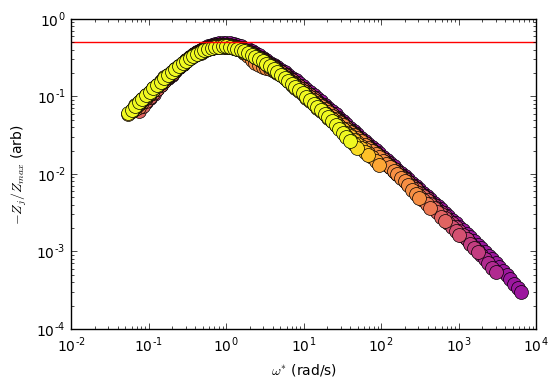

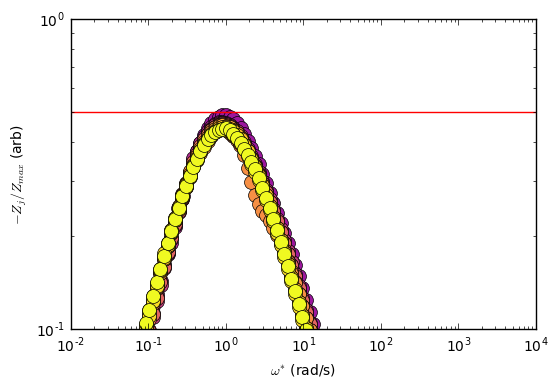

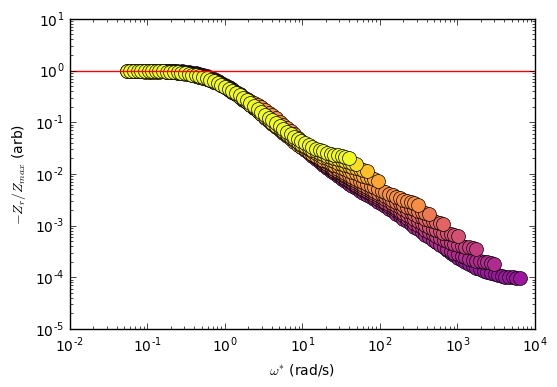

In [240]:
# define a frequency wStar which should make the data superpose. note that we are also normalizing the y-scale of the data

w0 = np.zeros(tmax-offSet)
ZiNormAll = np.zeros((Zi(offSet).shape[0],tmax-offSet))
wStar = np.zeros((w(offSet).shape[0],tmax-offSet))
# ZrNormAll = np.zeros((Zr(offSet).shape[0],tmax-offSet))
ZrMax = np.zeros(tmax-offSet)

def ZrNormAll(t): #pulls out Z'' in units of kOhm*cm^{2}
    return Zr(t+offSet)[:]/np.amax(Zr(t+offSet)[bounds[t]:])

# def ZiNormAll(T,t):
#     return -Zi(T)[:]/-Zi(T)[wt0[t]]

for t in range(0,bounds.shape[0]-1):
    w0[t] = w(t+offSet)[wt0[t]]*np.exp(Etau/(kB*T[t+offSet]))
    wStar[:,t] = (w(t+offSet)*np.exp(Etau/(kB*T[t+offSet])))/w0[t] 
    ZrMax[t] = np.amax(Zr(t+offSet)[bounds[t]:])
#     ZiNormAll[:,t] = -Zi(t+offSet)[:]/-Zi(t+offSet)[wt0[t]]
    ZiNormAll[:,t] = -Zi(t+offSet)[:]/ZrMax[t]
    
#     ZrNormAll[:,t] = Zr(t+offSet)[:]/max

# now make the plots. first the imaginary axis
fig,ax = plt.subplots(1,1)
for t in range(0,bounds.shape[0]-1):
    ax.plot(wStar[bounds[t]:,t],abs(-ZiNormAll[bounds[t]:,t]),'o', markersize = 10,color = tuple(colSet[t+offSet]))
ax.plot([1e-2, 1e4], [0.5, 0.5], 'r-')        
ax.set_xlabel("$\omega^{*}$ (rad/s)")
ax.set_ylabel("$-Z_{j}/Z_{max}$ (arb)")
ax.set_xscale("log") 
ax.set_yscale("log") 
# ax.set_ylim([1e-1,1e0]);
# ax.set_title("Rescaled Im(Z) vs. $\omega$")
plt.savefig('ImZ_rescale.png')

fig,ax = plt.subplots(1,1)
for t in range(0,bounds.shape[0]-1):
    ax.plot(wStar[bounds[t]:,t],abs(-ZiNormAll[bounds[t]:,t]),'o', markersize = 10,color = tuple(colSet[t+offSet]))
ax.plot([1e-2, 1e4], [0.5, 0.5], 'r-')        
ax.set_xlabel("$\omega^{*}$ (rad/s)")
ax.set_ylabel("$-Z_{j}/Z_{max}$ (arb)")
ax.set_xscale("log") 
ax.set_yscale("log") 
ax.set_ylim([1e-1,1e0]);
# ax.set_title("Rescaled Im(Z) vs. $\omega$")
plt.savefig('ImZ_rescaleZoom.png')



fig,ax = plt.subplots(1,1)
for t in range(0,bounds.shape[0]-1):
    ax.plot(wStar[bounds[t]:,t],ZrNormAll(t)[bounds[t]:],'o', markersize = 10,color = tuple(colSet[t+offSet]))
ax.plot([1e-2, 1e4], [1, 1], 'r-')    
ax.set_xlabel("$\omega^{*}$ (rad/s)")
ax.set_ylabel("$-Z_{r}/Z_{max}$ (arb)")
ax.set_xscale("log") 
ax.set_yscale("log") 
ax.set_ylim([1e-5,1e1]);
# ax.set_title("Rescaled Re(Z) vs. $\omega$")
# plt.savefig('ReZ_rescale.png')

    




So the re-scaling works! There appears to be one dominant relaxation process at the frequencies we are concerned about. note that we truncated the data at the low frequency end, for whatever that's worth. Since there isn't an RC arc at those frequencies, but instead some sort of diffusion impedance, I don't expect this should be too much of a problem.

The last thing we want to do to finish up this analysis is look at the distribution of $G(\tau)$ according to Orazem, et. al. and Brug, et.al. 

We calculate 2 functions: the first is $F(s)$, where $s = ln(\frac{\tau}{\tau_0})$. According to Brug, et. al, this should be a log-normal function of $\tau$, which implies it is normal with respect to $s$.

The second function we calculate is $G(\tau)$, which is related to $F(s)$ by $\tau G(\tau) = F(s)$. This is a bit nicer of a way to present this data, since we explicitly have $\tau$ on the abcissa. Again, $\tau G(\tau)$ should be a log-normal function of $\tau$. 

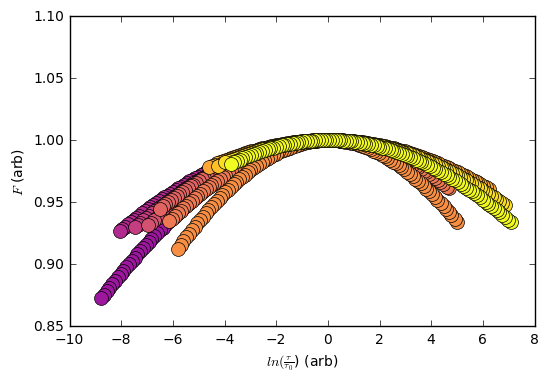

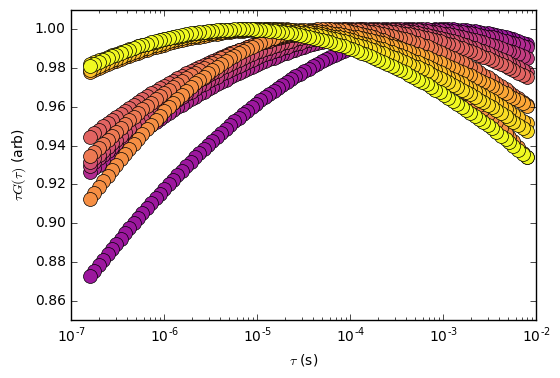

In [233]:
# calculate and plot the distribution of lifetimes G(\tau)

tauArray = 1/w(1)[:]
G = np.zeros((w(offSet).shape[0],tmax-offSet))
Gnorm = np.zeros((w(offSet).shape[0],tmax-offSet))
sArray = np.zeros((w(offSet).shape[0],tmax-offSet))
F = np.zeros((w(offSet).shape[0],tmax-offSet))
Fnorm = np.zeros((w(offSet).shape[0],tmax-offSet))
tG = np.zeros((w(offSet).shape[0],tmax-offSet))
tGnorm = np.zeros((w(offSet).shape[0],tmax-offSet))

# calculate the distribution for 200 different lifetimes that span from 1 order of magnitude above the largest \tau and 1 
# order of magnitude smaller than the lowest \tau
for t in range(bounds.shape[0]-1):
    G[:,t] = (1/(2*np.pi*tauArray[:]))*((np.sin(np.pi*alphaFits[t]))/(np.cosh((1-alphaFits[t])*np.log(tauArray[:]/tau[t])) - np.cos(alphaFits[t]*np.pi))) 
    Gnorm[:,t] = G[:,t]/np.amax(G[:,t])
    
    sArray[:,t] = np.log(tauArray[:]/tau[t])
    
    F[:,t] = ((np.sin(np.pi*alphaFits[t]))/(np.cosh((1-alphaFits[t])*np.log(tauArray[:]/tau[t])) - np.cos(alphaFits[t]*np.pi)))
    Fnorm[:,t] = test[:,t]/np.amax(test[:,t])   
    
    tG[:,t] = tauArray*G[:,t]
    tGnorm[:,t] = tG[:,t]/np.amax(tG[:,t])
    
    
# first plot the F function, which is a **normal** distribution of ln((\tau)/(\tau_0))    
fig,ax = plt.subplots(1,1)
for t in range(0,bounds.shape[0]-1):
    ax.plot(sArray[:,t],Fnorm[:,t],'o', markersize = 10,color = tuple(colSet[t+offSet]))
#     ax.plot(tauArray[:],Gnorm[:,t],'o', markersize = 10,color = tuple(colSet[t+offSet]))
ax.set_xlabel("$ln(\\frac{\\tau}{\\tau_{0}}$) (arb)")
ax.set_ylabel("$F$ (arb)")
# ax.set_xscale("log") 
# ax.set_yscale("log") 
ax.set_ylim([0.85,1.1]);
# ax.set_xlim([-1,1e-3]);
plt.savefig('F_distribution.png')


# now plot the G function, which is a power law function of \tau
fig,ax = plt.subplots(1,1)
for t in range(0,bounds.shape[0]-1):
    ax.plot(tauArray[:],tGnorm[:,t],'o', markersize = 10,color = tuple(colSet[t+offSet]))
ax.set_xlabel("$\\tau$ (s)")
ax.set_ylabel("$\\tau G(\\tau)$ (arb)")
ax.set_xscale("log") 
# ax.set_yscale("log") 
ax.set_ylim([0.85,1.01]);
# ax.set_xlim([-1,1e-3]);
plt.savefig('G_distribution.png')




We will attempt to link these quantities by a method first outlined by Hirschorn and Orazem [(10.1149/1.3499565)](http://jes.ecsdl.org/content/158/12/C424.abstract?utm_source=TrendMD&utm_medium=cpc&utm_campaign=Journal_of_The_Electrochemical_Society_TrendMD_0) in wich CPE behavior is posited to be the result of a **power law distrinution of resisitivies** throughout the film thickness. This theory may be applicable in our case because it explicitly addresses variations in resistivity and transport along the axis normal to the electrode surface, and we know that transport in QD films is highly local.

It will be interesting to see if this matches with the intuition we have about transport in the ZnO layer vs. transport the in the PbS layer. In particular, we expect the ZnO part to have a lower resistivity $\rho$ than the PbS layer. Is this seen in the data? Does this imply that charge transfer at the junction is the rate limiting step? Does the CPE result from loss due to surface states at this interface?

To formalize this analysis, we will certainly need the following information:

1) film thickness

2) total stack dielectric constant

For now, let's simply assume a uniform PbS/ZnO device of thickness $\delta = 300$ nm or so and $\varepsilon = 12\varepsilon_{0}$. We can ammend this data later.

To complete this analysis, we will do the following:

1) Calculate the resistivity at one boundary $\rho_{\delta}$ using the following equation from the Hirschorn paper:
    $Q_{eff} = \frac{(\epsilon\varepsilon_{0})^{\alpha}}{g \delta \rho_{\delta}^{(1-\alpha)}}$. Here, $\delta$ is the film 
    thickness, and $g = 1 + 2.88(1-\alpha)^{2.375}$ as determined numerically by Hirschorn, et. al.
    
2) See if we can esimate the resisitivy at the other boundary $\rho_{0}$, by considering the DC limit of the impedance and the following equation: $Z(\omega = 0) = \frac{(\rho_{0} \varepsilon \varepsilon_{0})^{\alpha}}{Q_{eff}}$

3) Plug these values into the following proposed power law distribution:
    $\frac{\rho}{\rho_{\delta}} = (\frac{\rho_{\delta}}{\rho_{0}} + (1 - \frac{\rho_{\delta}}{\rho_0}) \xi^{\gamma})^{-1}$
    Here, $\xi = \frac{x}{\delta}$ is a dimensionless position parameter, and $\gamma$ is defined in terms of $\alpha$: $\alpha = \frac{1-\gamma}{\gamma}$.
    
The end goal of this is to get some idea of how all of this hangs together. From there, we can see how far we want to pursue these ideas. 


Let's start by calculating $\rho_{\delta}$. Do this for the $Q$ and $\alpha$ parameters obtained by the fit and graphical analysis (appended 1 and 2 in the code, respectively), but I will only refer to the fit parameters in the markdown comments.

In [15]:
# calculate \rho_{\delta} in units of ohm*cm

epsilon0 = 8.854e-14
epsilon = 12
gFac = 1 + (2.88*(1-afit)**(2.375))
delta = 300e-7

#note the units on Q!
rhoD1 = ( ((epsilon*epsilon0)**(afit))/(gFac * delta * Qfit*1e-3))**(1/(1-afit))
rhoD2 = ( ((epsilon*epsilon0)**(alpha))/(gFac * delta * Qeff*1e-3))**(1/(1-alpha))

print(rhoD1, 1/(1-afit))
print(rhoD2, 1/(1-alpha))




3.84923862538e+12 15.5381031142
54537.7195909 8.3800610396


After wrangling around with the units for quite some time, we get $\rho_{\delta} \approx 9.0 \times 10^{4} \Omega cm$.

Now we need to calculate $\rho_{0}$. Do this by taking the DC limit ($Z(\omega = 0)$), which according to Hirschorn should be  related to $\rho_{0}$ via the equation in point (2) above. So we're going to need to inspect the JV curve for this device and extract the DC resistance at 400mV applied bias to match the bias applied during the impedance measurement.

[ 1398.8080407]
[ 21304197.37480595] [  1.15828944e+08]


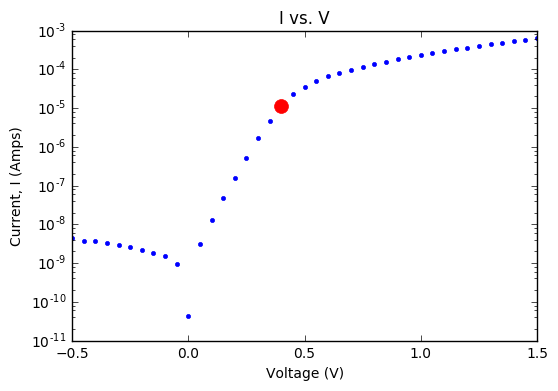

In [16]:
# import and plot IV  or JV data. extract the current at the point of interest. calculate the resulting impedance.
# then, calculate $\rho_{0}$

ivData = np.genfromtxt('dev1_fullrange_300K.txt')

# print(ivData)
# print(ivData.shape)
# print(ivData[0:41])


# initialize new array, with first column for voltage data and second column for current data
iv = np.zeros((2,41))
jv = np.zeros((2,41))

iv[0,:] = ivData[0:41]
iv[1,:] = ivData[41:]

# define an array for current density
jv[0,:] = iv[0,:]
jv[1,:] = (1e3*iv[1,:])/4e-2

# print(jv[0,:])

# calculate the DC impedance at V = 400mV, z0, in units of Ohm cm^{-2}
poi = np.where(iv[0,:] == 0.4)[0]
i0 = iv[1,poi]
z0 = ((iv[0,poi]/iv[1,poi])*4e-2)

print(z0)

# plot the IV data and label the point of interest
fig,ax = plt.subplots(1,1)
ax.plot(iv[0,:],abs(iv[1,:]),'.')
ax.plot(iv[0,poi],abs(iv[1,poi]),'r.',markersize = 20)
ax.set_xlabel("Voltage (V)")
ax.set_ylabel("Current, I (Amps)")
ax.set_yscale("log") 
ax.set_title("I vs. V")
plt.savefig('IV.png')


rho01 = ( ((Qfit*1e-3)*z0)**(1/afit))/(epsilon*epsilon0)
rho02 = ( ((Qeff*1e-3)*z0)**(1/alpha))/(epsilon*epsilon0)

print(rho01, rho02)



We obtain $\rho_{0} = 9.21\times 10^{7} \Omega cm$. This is high, but higher values were obtained by CPE analysis in the references above.

At this point, it might be helpful to try and understand why $\rho$ at both ends of the distribution is so large. Is this reasonable for a semiconductor?

Well, I would say it depends on the frequency range in which you are interrogating charge transport. From the first Hirschorn paper above, we know that the CPE is only a good model in a frequncy range determined by the resisitivies above. We can compute this frequency range by determining the dielectric relaxation frequencies associated with $\rho_{0}$ and $\rho_{\delta}$. Specifically, $\omega_{0} = (\rho_{0}\varepsilon \varepsilon_{0})^{-1}$, and likewise $\omega_{\delta} = (\rho_{\delta}\varepsilon \varepsilon_{\delta})^{-1}$.

Let's see what these frequencies are:


According to Hirschorn's theory paper ([doi: 10.1149/1.3499564](http://ww2.che.ufl.edu/orazem/pdf-files/Hirschorn-powerlaw-theory-2010.pdf)), CPE parameters are throught to arise from a **distribution of time constants**, which they then relate in their paper above to a distribution of resistity in the film. They assume a power law distribution of resistivity in a direction normal to the electrode surface:

$\frac{\rho}{\rho_{\delta}} = (\frac{\rho_{\delta}}{\rho_{0}} + (1 - \frac{\rho_{\delta}}{\rho_0}) \xi^{\gamma})^{-1}$

Here, $\xi = \frac{x}{\delta}$ is a dimensionless position parameter, and $\gamma$ is defined in terms of $\alpha$: $\alpha = \frac{1-\gamma}{\gamma} \implies \gamma = (1-\alpha)^{-1}$.

Let's calculate what this distribution looks like for our film, using $\rho_{\delta}$, $\rho_{0}$, and $\alpha$ calculated above. Let $\delta = 300$ nm. Note that we are converting the units back into $k\Omega cm$ in this case.
